<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

![](https://matplotlib.org/3.1.1/_images/sphx_glr_anatomy_001.png)

# What to expect in this chapter

We use Matplotlib to produce simple, decent-looking plots. However, we haven’t really (barely) tapped the full power of what Matplotlib can do. 

The ‘dialect’ we have used to talk to Matplotlib is called the Matlab-like pyplot(`plt`) interface. 

From here onward, we will use the other, more powerful ‘dialect’ called the Object Oriented (OO) interface. This way of talking to Matplotlib gives us a more nuanced control over what is going on by allowing us to manipulate the various axes easily.



# 1 Some nomenclature

Before going ahead, let’s distinguish between a Matplotlib `figure` and an `axis`.

A figure is simple; it is the full canvas you use to draw stuff on. An axis is the individual mathematical axes we use for plotting. So, one figure can have multiple axes, as shown below, where we have a (single) figure with four axes.



![](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/__imgs__/plotting_good_exercise-01_solution.png)

By the way, you had already encountered a situation with multiple axes in the last chapter when we used `twinx()`. 

It is not uncommon to struggle with the concept of axes; but don’t worry; it will become clearer as we work through this chapter.



# 2 Comparing the two ‘dialects’

Let me create the same plot using both `pyplot` and OO ‘dialects’ so that you can see how the latter works. The plot I will be creating is shown below.



![](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/__imgs__/plotting_good-01.png)

In [7]:
import numpy as np
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)
from matplotlib import pyplot as plt

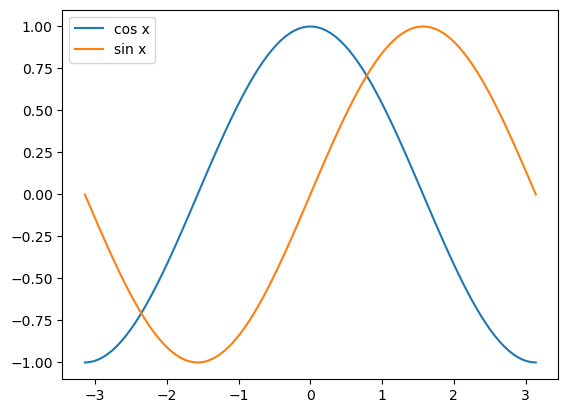

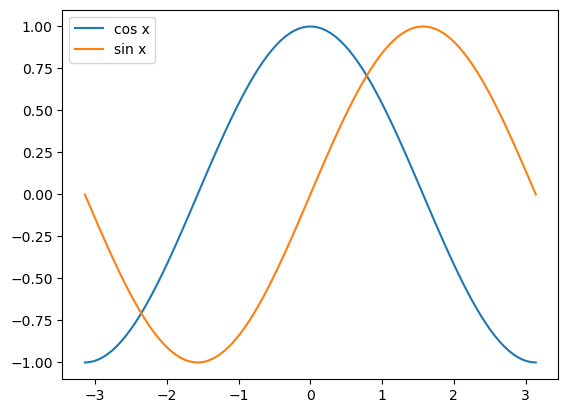

In [8]:
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()

### `pyplot` Interface

### OO Interface

For the OO interface, we have to start by using `subplots()` to ask Matplotlib to create a figure and an axis. Matplotlib obliges and gives us a figure (`fig`) and an axis (`ax`).

Although I have used the variables `fig` and `ax` you are free to call them what you like. But this is what is commonly used in the documentation. In this example, I need only one column and one row. But, if I want, I can ask for a grid like in the plot right at the top.

Yes, the OO looks more comlicated than the `pyplot`Remember to use the pyplot interface for quick and dirty plots and the OO interface for more complex plots that demand control and finesse.

 version. But, it offers so much freedom that it is worth learning it for more demanding, complex plots. You will see this soon.

Remember to use the pyplot interface for **quick** and **dirty** plots and the OO interface for more complex plots that demand control and finesse.



# 3 What is OO ax, really?

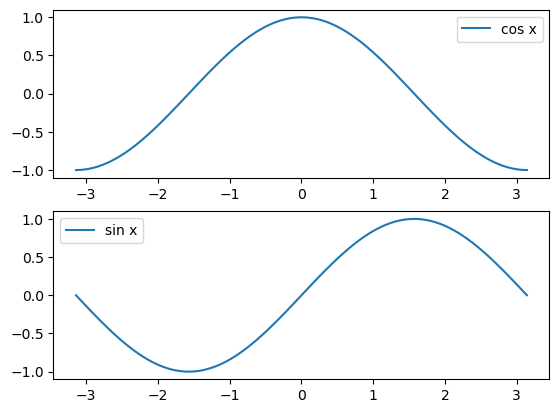

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

To get the above plot, we must ask for two rows (`nrows=2`) and one column (`ncols=1`). We do this by using `subplots()`.



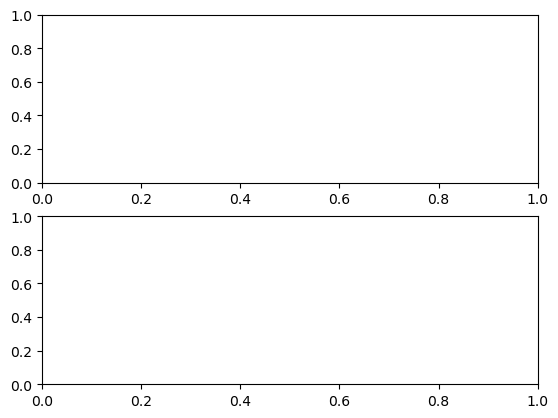

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=2)  
#This gives me two axes so that I can plot in both panes.

In [13]:
type(ax)

numpy.ndarray

In [14]:
ax.shape

(2,)

In [15]:
type(ax[0])

matplotlib.axes._axes.Axes

# 4 A complete OO example

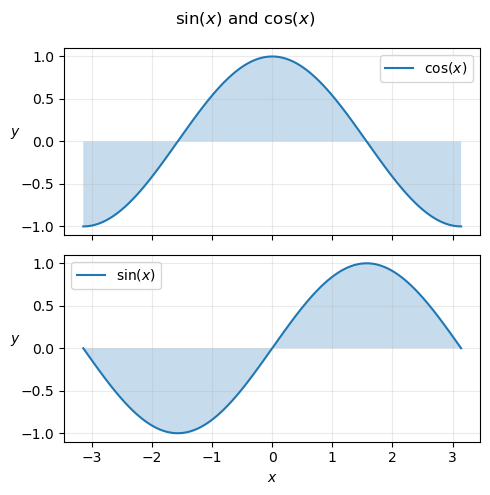

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()

1. Set up the axes and figure
   - Get two axes ready to plot in two rows in one column.
   - Change the size of the figure by specifying a figure size (`figsize`).
   - Ask that the plots share the  x-axis using `sharex`.
2. Since `ax` is a NumPy array with two axes, we can index them using `0` and `1`. Then we just `plot` to that axis.
3. Use `fill_between()` to fill the plots.
   - I have again just indexed the NumPy array to access the axes.
4. Draw the legends
   - As in the previous example, we can do this one axis at a time. However, a more sensible way to do this is with a `for` loop that iterates through the items in ax
   - Let’s also add a grid to each plot and set the label.
5. We are sharing the x -axis. So, we only need to label the lowest plot. This has the index 1.
6. Let’s add a super title to the **figure** (notplot).
7. Finally, let’s ask Matplotlib to make any necessary adjustments to the layout to make our plot look nice by calling `tight_layout()`. It would help if you convinced yourself of the utility of `tight_layout()` by producing the plot with and without it.

Unfortunately, the `pyplot` and OO interfaces don’t use identical function names. For example, `pyplot` used `xlabel()` to set the x label, but OO uses `set_xlabel()`. 

# 5 Multiple rows and columns

![](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/__imgs__/plotting_good_exercise-01_solution.png)

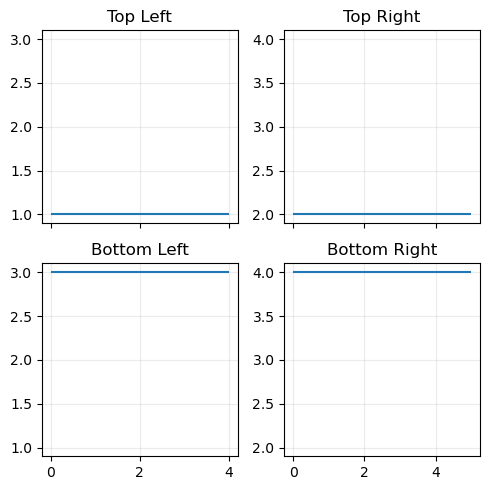

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

### Using ax

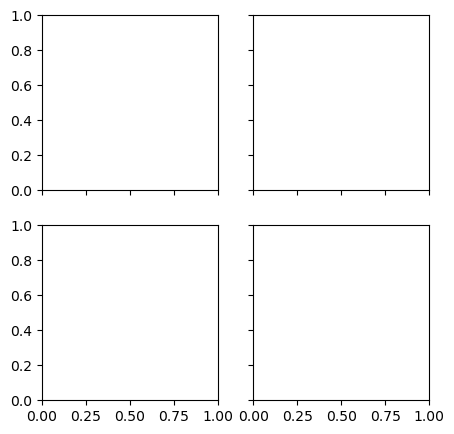

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')

#this creates the figure and axes

In [21]:
ax.shape #arranged in a 2 x 2 array

(2, 2)

In [23]:
ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right') 

#how to access each of the axes 

Text(0.5, 1.0, 'Bottom Right')

In [28]:
#to tweak each axis,
#either

top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

In [29]:
#or

top_left, top_right, bottom_left, bottom_right = ax.flatten()

`flatten()` takes the 2D array and ‘flattens’(dah) it into a 1D array; unpacking takes care of the assignments.



In [30]:
top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

#using the function hlines()

## 5.1 Sharing axes

Notice I have asked Matplotlib to make the plots more compact by sharing the x and y axes using `sharex` and `sharey`.

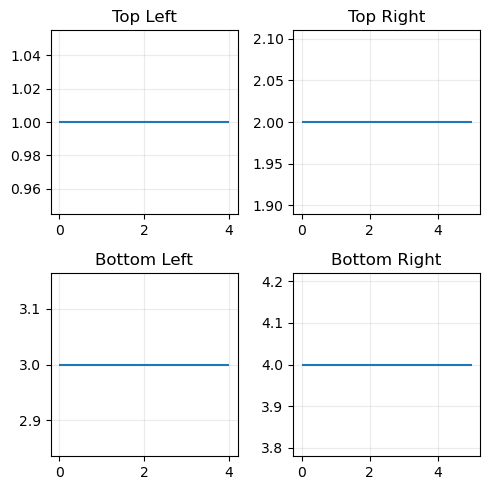

In [40]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                      )

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

You see that Matplotlib has auto-scaled both axes. In particular, the plots on the left go from `0` to `4`, and those on the right go from `0` to `5`, as these are the lengths I used for the lines.



| Option | Result                                           |
|--------|--------------------------------------------------|
| `True` | Makes all the axes use the same range.           |
| `col`  | Use the same range for all the columns           |
| `row`  | Use the same range for all the rows              |


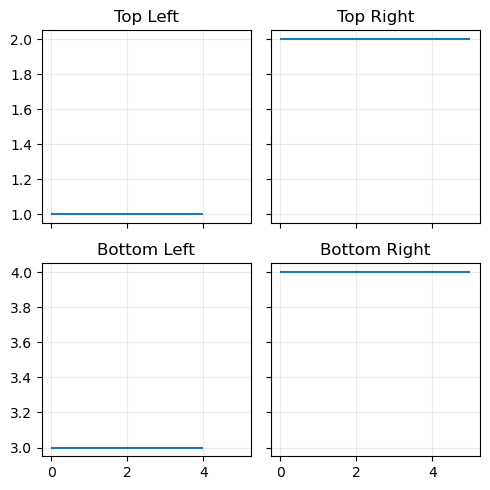

In [41]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'
)

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

However, `sharex='col'` is more suited for the data we are plotting, so let’s use that instead.



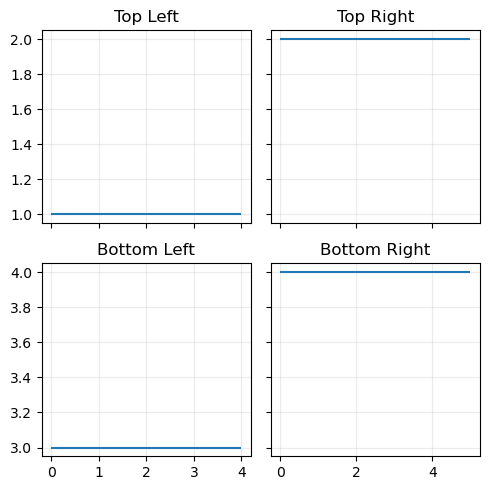

In [42]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

## 5.2 Accessing all axes

In [45]:
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

But this is inefficient and requires a lot of work. It is much nicer to use a `for` loop.



In [46]:
for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

A histogram is a valuable tool for showing distributions of data. For this example, I have extracted some actual data from sg.gov related to the mean monthly earnings of graduates from the various universities in Singapore.



### Data

|   | Mean basic monthly earnings by graduates|
|------------|--------------|
| All      | [sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv](sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv)          |
| NUS Only  | [sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv](sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv)           |

### A quick helper function

I will need to read the data from these files several times. So, I will create a function called `det_plot_data()` that I can call. You must examine the file structure to understand the data and why I am skipping the first line.



def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

### The histogram

plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

![](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/__imgs__/plotting_good_other_histogram.png)

## 6.2 Scatter plots

Scatter plots are created by putting a marker at an (x,y) point you specify. They are simple yet powerful.

I am going to use `range()` along with `len()` to generate a list `[0,1,2...]` appropriate to the dataset.

In [ ]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

![](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/__imgs__/plotting_good_other_scatter.png)

## 6.3 Bar charts

I am using some dummy data for a hypothetical class for this example. I extract the data and typecast to pass two lists to `bar()`. Use `barh()` if you want horizontal bars.



In [ ]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

![](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/__imgs__/plotting_good_other_bar.png)

## 6.4 Pie charts

In [ ]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')

![](https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/__imgs__/plotting_good_other_pie.png)